In [1]:
from parse_touchpad_data import TouchpadData
import pandas as pd
import numpy as np

from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib as mpl
import itertools


from sklearn.mixture import BayesianGaussianMixture
from scipy import stats
from scipy import linalg


In [2]:
accept = TouchpadData('dataset/accept')
reject = TouchpadData('dataset/reject')

In [3]:
import pickle

with open('accept_data.pickle', 'wb') as f:
    pickle.dump(accept, f, pickle.HIGHEST_PROTOCOL)

with open('reject_data.pickle', 'wb') as f:
    pickle.dump(reject, f, pickle.HIGHEST_PROTOCOL)

In [4]:
# sns.heatmap(accept.data[10], xticklabels=False, yticklabels=False)
accept.data[20]

array([['0', '0', '-1', '0', '0', '0', '0', '-1', '0', '-1', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '-1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0'],
       ['-1', '-1', '-1', '0', '0', '0', '3', '6', '0', '0', '0', '0',
        '0', '-1', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '-1', '-1', '0', '2', '100', '154', '7', '-1', '1',
        '0', '-6', '-5', '0', '0', '0', '0', '0', '-1'],
       ['0', '-1', '0', '0', '0', '2', '111', '225', '19', '-3', '0',
        '-2', '-8', '-8', '-1', '-2', '0', '0', '0', '-1'],
       ['-1', '-2', '0', '-1', '0', '0', '4', '10', '0', '-1', '0', '-2',
        '-2', '-3', '-1', '-1', '-1', '-1', '-1', '-1'],
       ['-2', '-1', '-1', '0', '0', '0', '0', '4', '14', '6', '0', '0',
        '-2', '-1', '0', '-2', '0', '0', '0', '0'],
       ['-1'

In [5]:
accept_mean = []
for data in accept.data:
    accept_mean.append(data.mean(axis=(0,1)))

reject_mean = []
for data in reject.data:
    reject_mean.append(data.mean(axis=(0,1)))

Text(0.5, 0, 'Pressure mean')

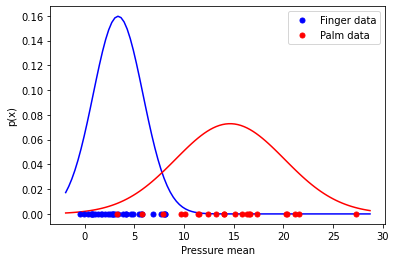

In [15]:
p11,p12 = plt.plot(accept_mean, np.zeros_like(accept_mean), 'b.', reject_mean, np.zeros_like(reject_mean), 'r.', zorder=3, markersize=10)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

mu, std = stats.norm.fit(accept_mean)
accept_norm = stats.norm.pdf(x,  mu, std)

mu, std = stats.norm.fit(reject_mean)
reject_norm = stats.norm.pdf(x, mu, std)

p21,p22 = plt.plot(x, accept_norm, 'b-', x, reject_norm, 'r-')

labels = ['Finger data', 'Palm data']
plt.legend([p11, p12], labels)
plt.ylabel('p(x)')
plt.xlabel('Pressure mean')

In [6]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

    
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


In [7]:
bmm_accept = [] 
first = True
for sample in accept.data:
    bmm_accept.append(BayesianGaussianMixture().fit(sample))
    if first:
        first = False
        X = sample
        sns.heatmap(sample, ax=ax, xticklabels=False, yticklabels=False)

        dpgmm = BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
        plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
        plt.show()

NameError: name 'ax' is not defined